In [4]:
import numpy as np
import pandas as pd
from nbodykit.source.catalog import CSVCatalog, BinaryCatalog
from nbodykit.algorithms.paircount_tpcf.tpcf import SimulationBox2PCF
from nbodykit.lab import UniformCatalog
import matplotlib.pyplot as plt

# Own functions 

In [5]:
def graphFunction(x,y, color=["purple","blue"], labels=["x","y"], titulo="", scatter=False, corte=[0,-1], limite=[]):
    '''
    Descripción: Función que grafica y con respecto a x
    IN = {
        x: Variable independiente.
        y: Variable dependiente.
        color: El color de la gráfica.
        labels: El nombre de las variables.
        titulo: El título
        scatter: Si es que se quieren resaltar los puntos
    }
    Out: Una bonita gráfica x-y
    '''
    # Creamos el objeto figura y nuestro ax.
    fig, ax = plt.subplots(figsize = (5, 3))
    # ponemos título
    ax.set_title(titulo)
    # Graficamos
    if scatter:
        ax.scatter(x[corte[0]:corte[1]],y[corte[0]:corte[1]], marker='.', c=color[1])
    ax.plot(x[corte[0]:corte[1]], y[corte[0]:corte[1]], color=color[0]) # Graficamos
    ax.set_xlabel(labels[0]) # Asignamos nombres a los labels
    ax.set_ylabel(labels[1]) # Asignamos nombres a los labels
    if limite != []:
        plt.ylim(top = max(limite), bottom= min(limite))
    ax.grid() # Con cuadrícula

# Algorithms 

In [3]:
columns = ["x", "y", "z", "vx", "vy", "vz"]
# read the data
f = CSVCatalog('./data/example_128_z0p000.*', columns)

# combine x, y, z to Position
f['Position'] = f['x'][:, None] * [1, 0, 0] + f['y'][:, None] * [0, 1, 0] + f['z'][:, None] * [0, 0, 1]
f.attrs["BoxSize"] = [512., 512., 512.]
print(f)
print(f.columns)

CSVCatalog(size=2097152, FileStack(CSVFile(path=/mnt/c/Users/david/Documents/College/Cosmology/Project/01-Correlation_and_PowerSpectrum_Of_Real_Data/data/example_128_z0p000.0, dataset=*, ncolumns=6, shape=(217309,)>, ... 10 files))
['Position', 'Selection', 'Value', 'Weight', 'vx', 'vy', 'vz', 'x', 'y', 'z']


In [4]:
random_cat = UniformCatalog(nbar=512/20000, BoxSize=512.)

In [5]:
L = 160
nbins = 15
bins = np.array([(Bin+1)*L/nbins for Bin in range(nbins+1)])
corr = SimulationBox2PCF(mode="1d", data1=f, show_progress=True, edges= bins, BoxSize=512.)

In [9]:
corr = SimulationBox2PCF.load("./results/CorrelationFuncionOfExample_128_z.json")

In [10]:
corr.attrs

{'mode': '1d',
 'edges': array([ 10.66666667,  21.33333333,  32.        ,  42.66666667,
         53.33333333,  64.        ,  74.66666667,  85.33333333,
         96.        , 106.66666667, 117.33333333, 128.        ,
        138.66666667, 149.33333333, 160.        , 170.66666667]),
 'Nmu': None,
 'pimax': None,
 'periodic': True,
 'BoxSize': 512.0,
 'los': 'z',
 'weight': 'Weight',
 'position': 'Position',
 'show_progress': True,
 'config': {}}

In [11]:
corr.corr

<WedgeBinnedStatistic: dims: (r: 15), variables: ('corr', 'r')>

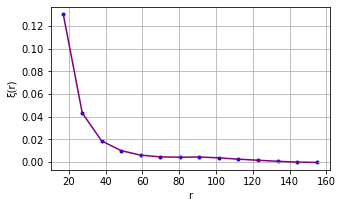

In [12]:
graphFunction(corr.corr["r"], corr.corr["corr"], labels=["r", "ξ(r)"], scatter=True)

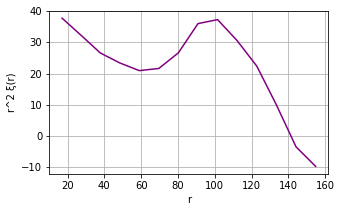

In [9]:
graphFunction(corr.corr["r"], corr.corr["r"]**2 * corr.corr["corr"], labels=["r", "r^2 ξ(r)"])

In [13]:
# Saving results
corr.save("./results/CorrelationFuncionOfExample_128_z.json")

In [14]:
corr.corr.to_json("./results/CorrelationFuncionOfExample_128_z_Copy.json")

In [ ]:
k_min = 1/r_max * (2pi)
dk = separación entre partículas promedio

In [ ]:
calcular de qué tamaño tend´ria que ser la caja si quiero PS de k = 10^-4

In [ ]:
la linea negra se hace bajo aproximaciones, como que la evolución de las fluctuaciones son lineales.